<a href="https://colab.research.google.com/github/SOORAJ-DSML/supply-chain-management/blob/main/supply_chain_management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import numpy as np


In [19]:
import pandas as pd

df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/supply_train.csv')

In [20]:
df

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,...,1,112,25.0,2009.0,18,0,C,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16615,16615,WH_116615,EID_66615,Urban,Large,West,Zone 6,3,1,6,...,0,240,19.0,2009.0,14,0,B+,5,23,16094
16616,16616,WH_116616,EID_66616,Urban,Large,North,Zone 5,2,0,2,...,1,164,30.0,NaN,17,0,B+,6,24,21113
16617,16617,WH_116617,EID_66617,Rural,Large,North,Zone 6,5,0,4,...,1,211,24.0,2003.0,24,1,B,5,29,28117
16618,16618,WH_116618,EID_66618,Rural,Small,West,Zone 6,3,2,3,...,1,119,NaN,2007.0,16,0,A,5,15,21103


In [21]:
# Check for duplicates
df.duplicated().sum()

0

In [22]:
df.isna().sum()

Unnamed: 0                         0
Ware_house_ID                      0
WH_Manager_ID                      0
Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      667
wh_est_year                     7860
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     599
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64

In [23]:
# Fill the 'wh_est_year' with the mean
df['wh_est_year'].fillna(value =df['wh_est_year'].mean(),inplace=True)

In [24]:
# Fill the 'approved_wh_govt_certificate' with the most frequent value
df['approved_wh_govt_certificate'].fillna(value='C',inplace=True)

In [25]:
# Fill the 'workers_num' with the mean
df['workers_num'].fillna(value =df['workers_num'].mean(),inplace=True)

In [26]:
# Check for missing values
df.isna().sum()

Unnamed: 0                      0
Ware_house_ID                   0
WH_Manager_ID                   0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

In [27]:
#delete unwanted columns
df = df.drop(columns = ['Ware_house_ID', 'WH_Manager_ID','Unnamed: 0'])

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation

<ipython-input-29-73a5e7325c46>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


(16.5, -0.5)

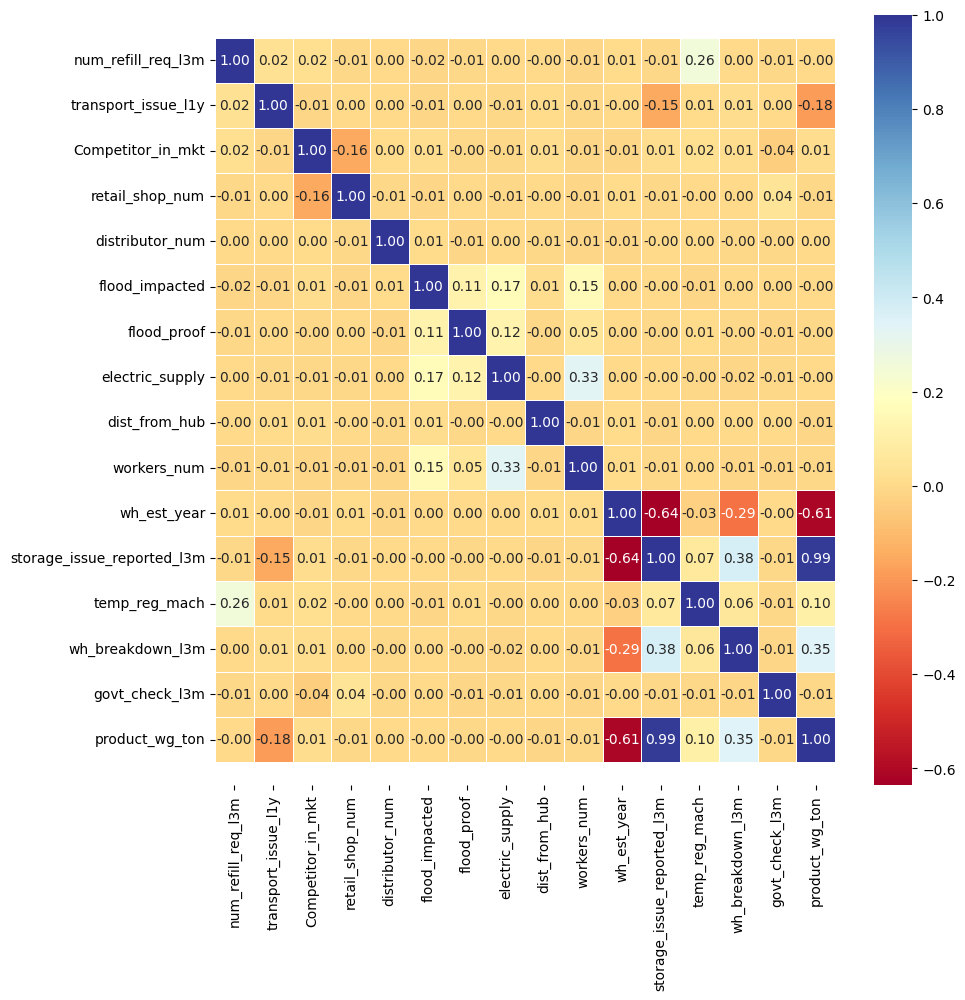

In [29]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="RdYlBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

<ipython-input-48-030508f39316>:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.drop('product_wg_ton', axis=1).corrwith(df.product_wg_ton).plot(kind='bar', grid=True, figsize=(12, 8),


<Axes: title={'center': 'Correlation with target'}>

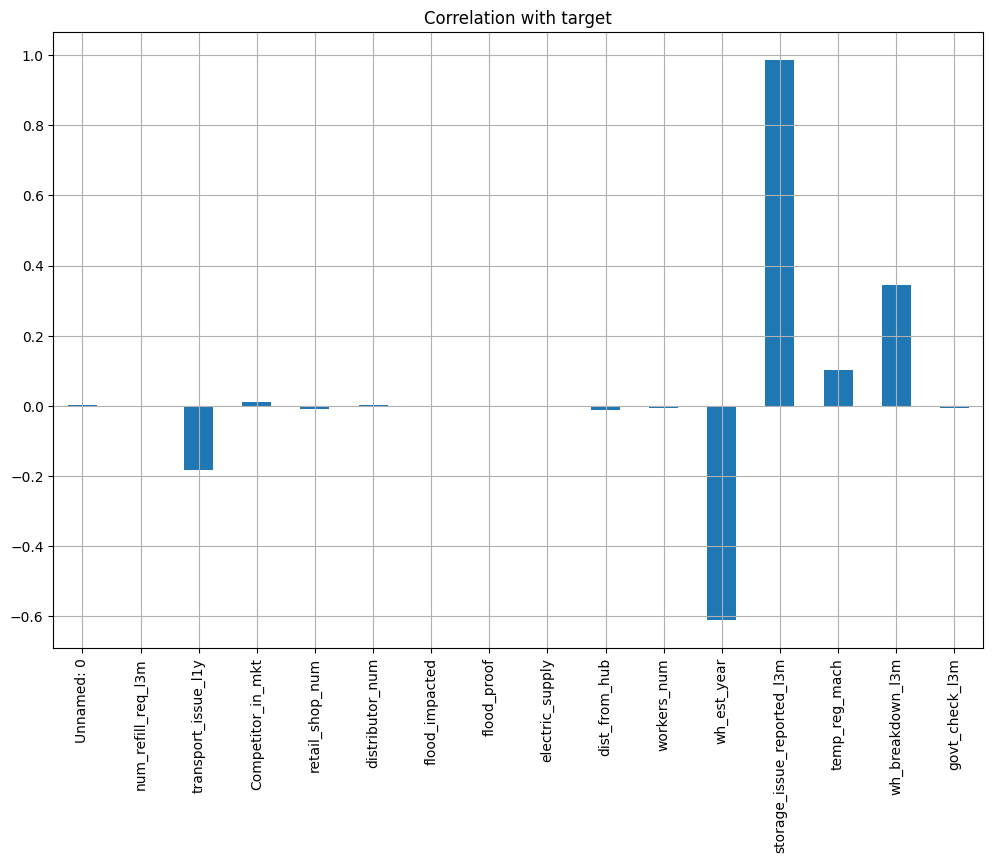

In [ ]:
# Check the correlations
df.drop('product_wg_ton', axis=1).corrwith(df.product_wg_ton).plot(kind='bar', grid=True, figsize=(12, 8),
                                                   title="Correlation with target")

<ipython-input-45-a2c156471c80>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Location_type',palette=['blue','yellow'])


Text(0.5, 1.0, 'Location_type Distribution')

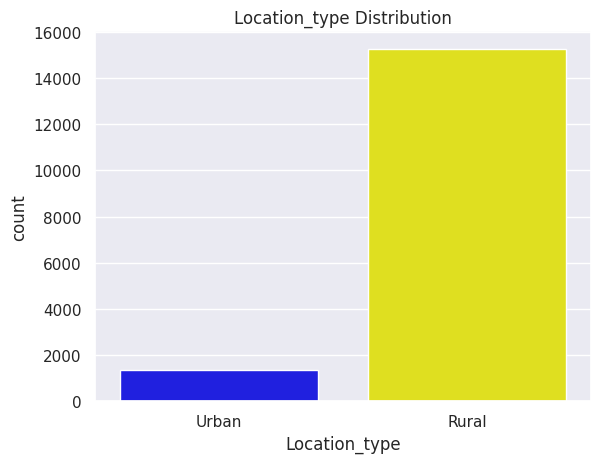

In [ ]:
sns.countplot(data=df, x='Location_type',palette=['blue','yellow'])
plt.title(f'Location_type Distribution')

<ipython-input-44-0879eedc01a5>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x="temp_reg_mach",y="product_wg_ton",palette=['red','green'])


<Axes: xlabel='temp_reg_mach', ylabel='product_wg_ton'>

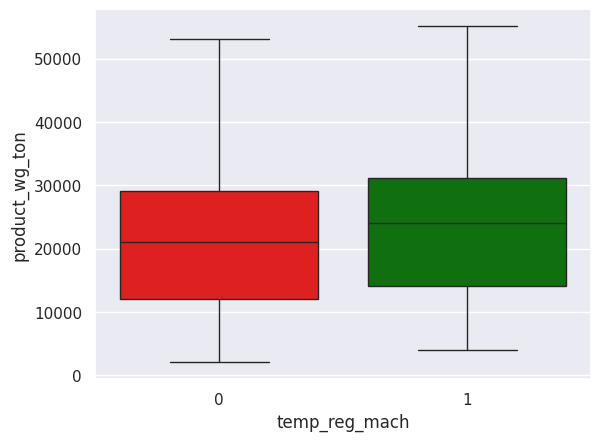

In [ ]:
sns.boxplot(data=df,x="temp_reg_mach",y="product_wg_ton",palette=['red','green'])

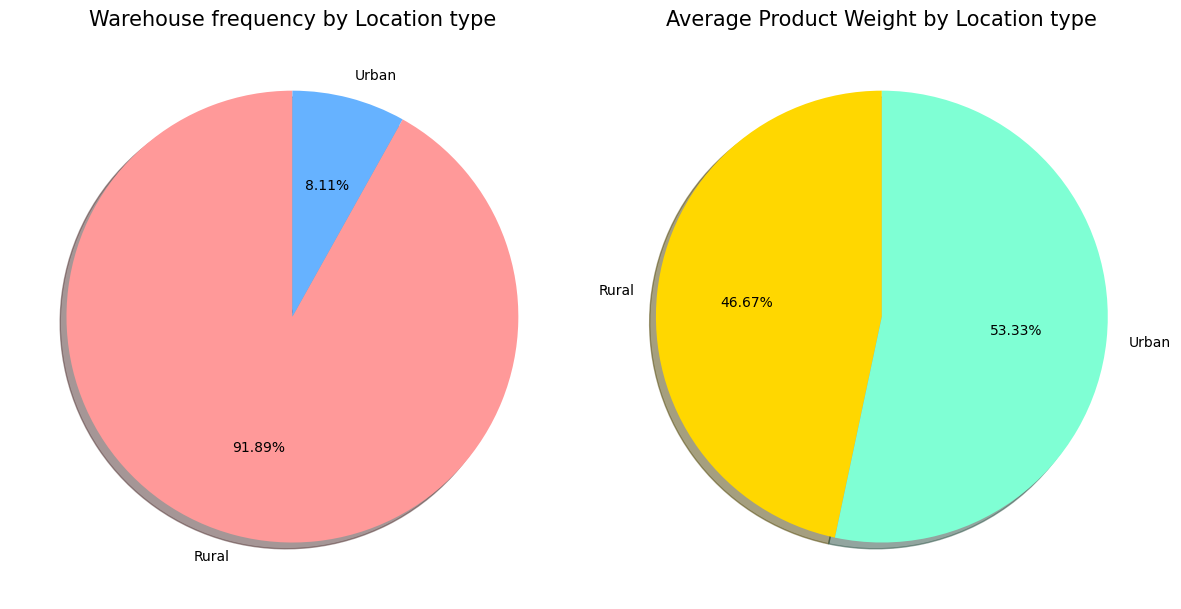

In [30]:

labels = ['Rural', 'Urban']
size_total =df['Location_type'].value_counts().tolist()

# colors for the pie charts
colors_freq = ['#FF9999', '#66B2FF']
colors_weight = ['#FFD700', '#7FFFD4']

size_mean = df.groupby('Location_type')['product_wg_ton'].mean().to_list()

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for frequency
axes[0].pie(size_total, colors=colors_freq, labels=labels, autopct='%.2f%%',
           shadow=True, startangle=90)
axes[0].set_title('Warehouse frequency by Location type', fontsize=15)

# Pie chart for average product weight
axes[1].pie(size_mean, colors=colors_weight, labels=labels, autopct='%.2f%%',
           shadow=True, startangle=90)
axes[1].set_title('Average Product Weight by Location type', fontsize=15)

# Adjusting layout
plt.tight_layout()
plt.show()

In [ ]:
total_weight = df['product_wg_ton'].sum()

# Calculate percentages
df['percentage'] = (df['product_wg_ton'] / total_weight) * 100


x = df.groupby('zone')['percentage'].sum()

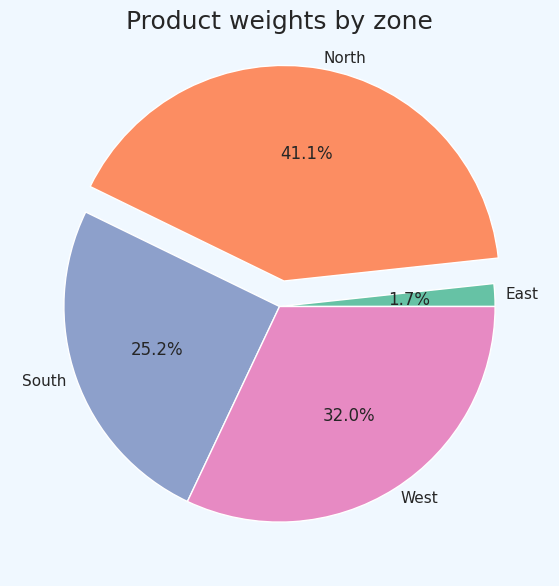

In [ ]:

labels = ['East', 'North', 'South', 'West']
sns.set(font_scale = 1)
fig, ax = plt.subplots(figsize=(8, 7), facecolor='aliceblue')
ax.pie(x, labels=labels,
       autopct='%1.1f%%',
       colors=sns.color_palette('Set2'),
       labeldistance=1.05,
       # Add space around only one slice
       explode=[0, 0.12, 0, 0])
plt.title('Product weights by zone', fontsize=18)
plt.show()

<ipython-input-43-6029b770c18c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='WH_capacity_size', data=df, palette=['green', 'red', 'yellow']).set(title="Warehouse")


[Text(0.5, 1.0, 'Warehouse')]

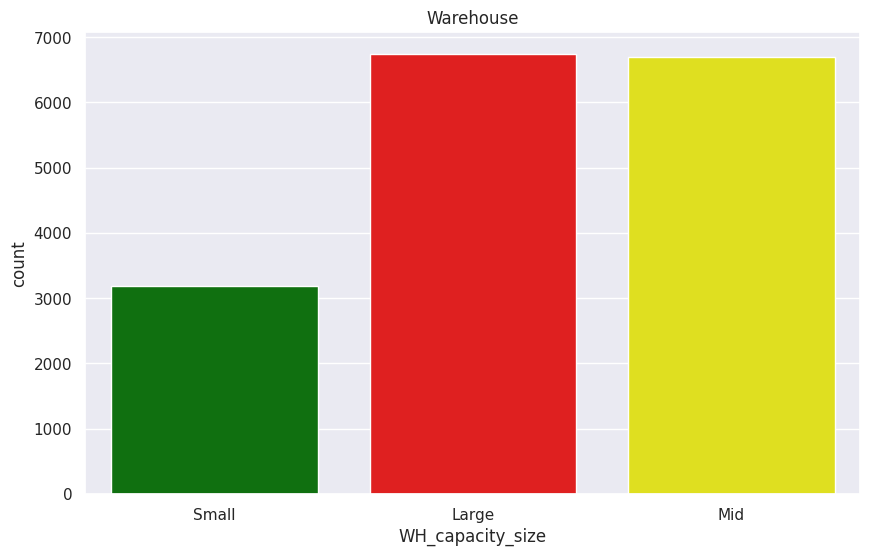

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='WH_capacity_size', data=df, palette=['green', 'red', 'yellow']).set(title="Warehouse")

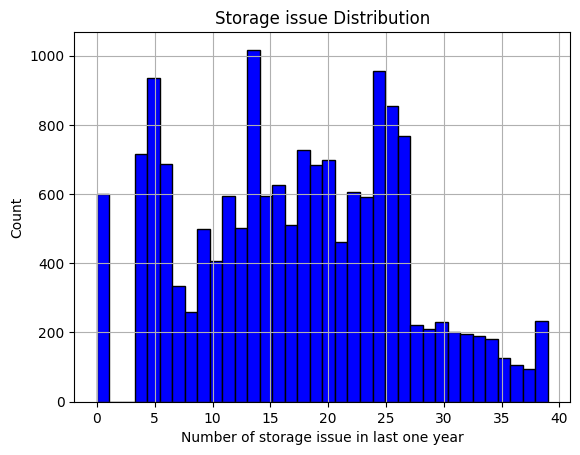

In [14]:
df['storage_issue_reported_l3m'].hist(bins='auto',color='blue', edgecolor='black')
plt.xlabel('Number of storage issue in last one year')
plt.ylabel('Count')
plt.title('Storage issue Distribution')
plt.show()

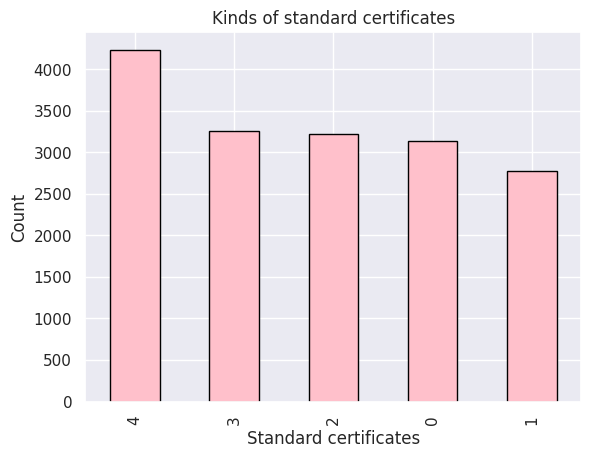

In [ ]:
WH_Cf_counts = df['approved_wh_govt_certificate'].value_counts().sort_values(ascending=False)
WH_Cf_counts.plot(kind="bar",color='pink', edgecolor='black')
plt.title('Kinds of standard certificates')
plt.ylabel('Count')
plt.xlabel('Standard certificates')
plt.show()

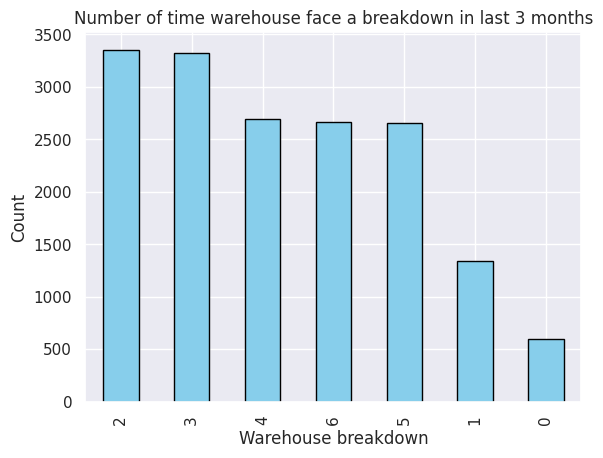

In [ ]:
WH_bk_counts = df['wh_breakdown_l3m'].value_counts().sort_values(ascending=False)
WH_bk_counts.plot(kind="bar",color='skyblue', edgecolor='black')
plt.title('Number of time warehouse face a breakdown in last 3 months')
plt.ylabel('Count')
plt.xlabel('Warehouse breakdown')
plt.show()

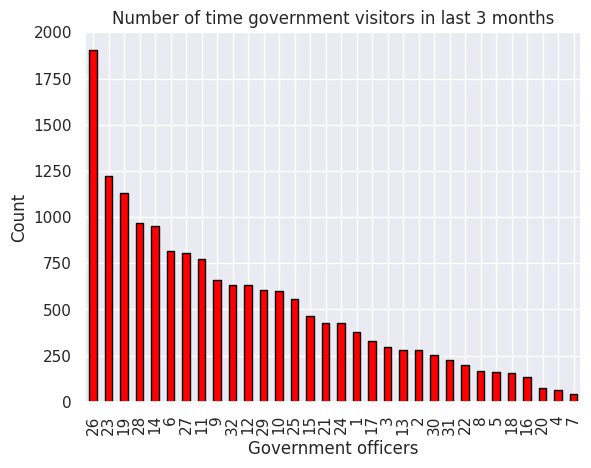

In [ ]:
govt_counts = df['govt_check_l3m'].value_counts().sort_values(ascending=False)
govt_counts.plot(kind="bar",color='Red', edgecolor='black')
plt.title('Number of time government visitors in last 3 months')
plt.ylabel('Count')
plt.xlabel('Government officers')
plt.show()

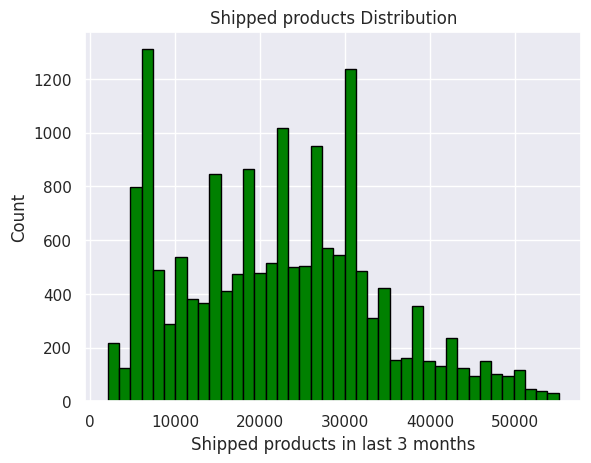

In [ ]:
df['product_wg_ton'].hist(bins='auto',color='Green', edgecolor='black')
plt.xlabel('Shipped products in last 3 months')
plt.ylabel('Count')
plt.title('Shipped products Distribution')
plt.show()

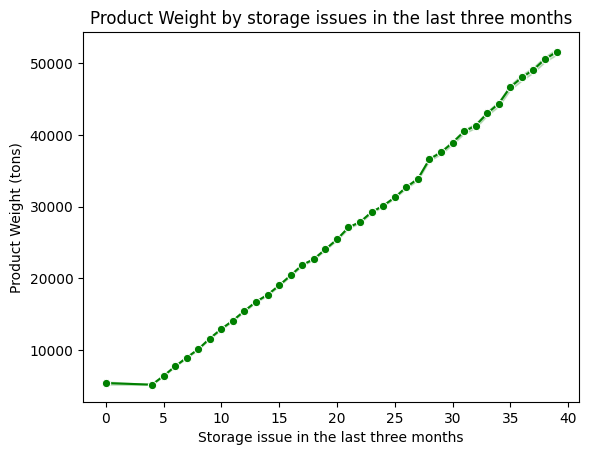

In [ ]:

sns.lineplot(data=df, x='storage_issue_reported_l3m', y='product_wg_ton', color='green', marker='o')
plt.xlabel('Storage issue in the last three months')
plt.ylabel('Product Weight (tons)')
plt.title('Product Weight by storage issues in the last three months')
plt.show()

<ipython-input-16-08ad2084d462>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df, x='product_wg_ton', fill=True, palette='viridis')


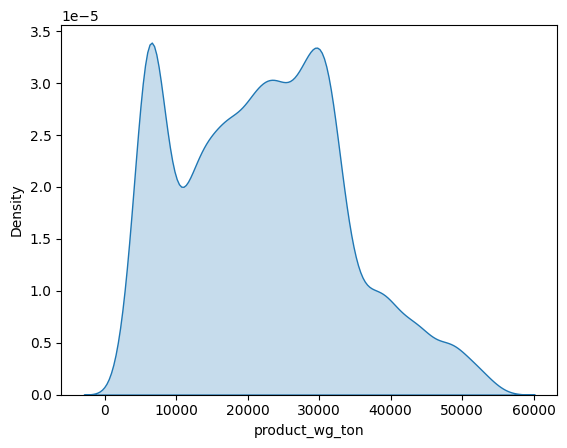

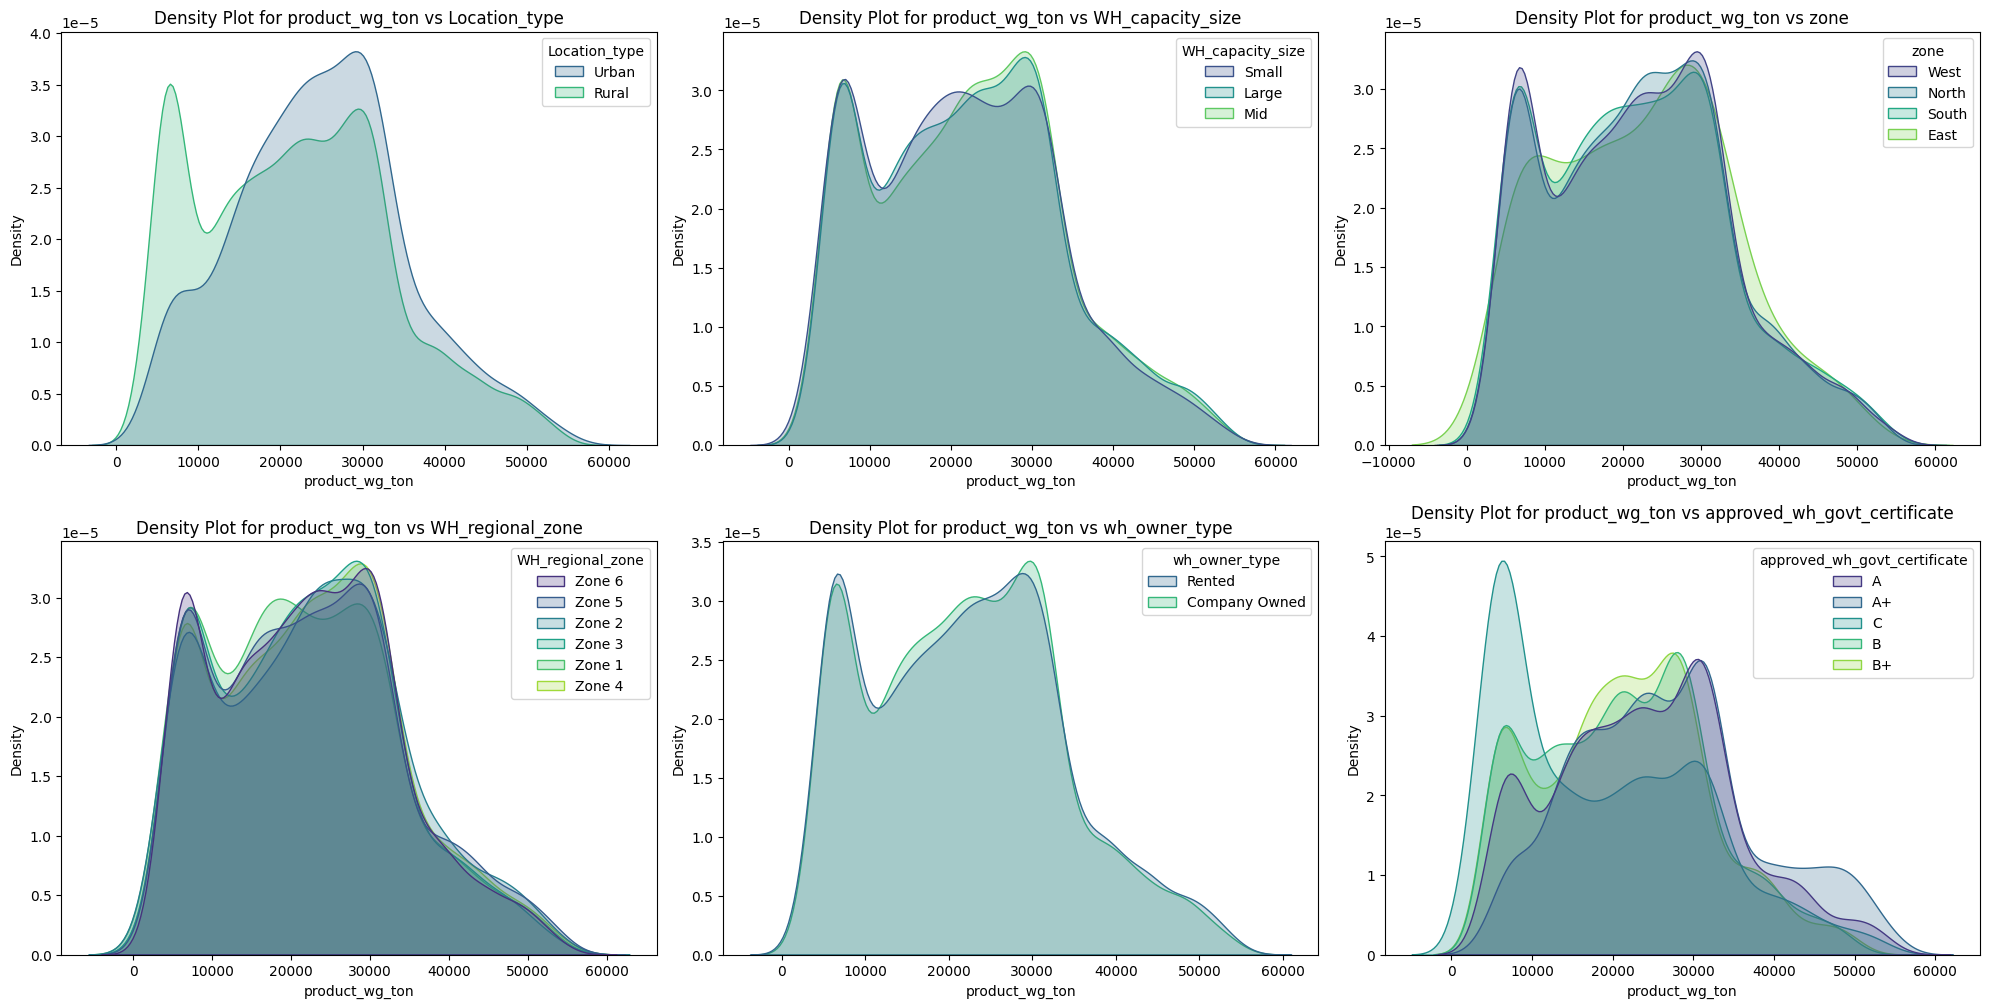

In [16]:
sns.kdeplot(data=df, x='product_wg_ton', fill=True, palette='viridis')
categorical_variables = ['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone', 'wh_owner_type',
                          'approved_wh_govt_certificate']

# Create Subplots for Density Plots of Categorical Variables 📊
plt.figure(figsize=(20, 15))
for i, variable in enumerate(categorical_variables, 1):
    plt.subplot(3, 3, i)
    sns.kdeplot(data=df, x='product_wg_ton', hue=variable, fill=True, common_norm=False, palette='viridis')
    plt.title(f'Density Plot for product_wg_ton vs {variable}')
    plt.xlabel('product_wg_ton')

plt.tight_layout()
plt.show()

Data preprocessing

In [37]:
X = df.drop(columns='product_wg_ton')
y = df['product_wg_ton']

In [38]:

from sklearn.preprocessing import LabelEncoder
# Create an instance of LabelEncoder
le = LabelEncoder()

df['Location_type'] = le.fit_transform(df['Location_type'])
df['WH_capacity_size'] = le.fit_transform(df['WH_capacity_size'])
df['approved_wh_govt_certificate'] = le.fit_transform(df['approved_wh_govt_certificate'])
df['zone'] = le.fit_transform(df['zone'])
df['WH_regional_zone'] = le.fit_transform(df['WH_regional_zone'])
df['wh_owner_type'] = le.fit_transform(df['wh_owner_type'])

In [39]:
# Function to create and display scatter plot for each model
def scatter_plot(model_name, actual_values, predicted_values):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=actual_values, y=predicted_values)
    plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], 'k--', lw=2)
    plt.xlabel('Actual Product Weight')
    plt.ylabel('Predicted Product Weight')
    plt.title(f'Actual vs Predicted Product Weight - {model_name}')
    plt.show()

In [40]:
from sklearn.model_selection import train_test_split
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler
# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

LINEAR REGRESSION

Linear regression is an algorithm that provides a linear relationship between an independent variable and a  dependent variable to predict the outcome of future events

MAE: 1270.0534295287532
MSE: 3052417.331352281
r2_score: 0.9775217809790999


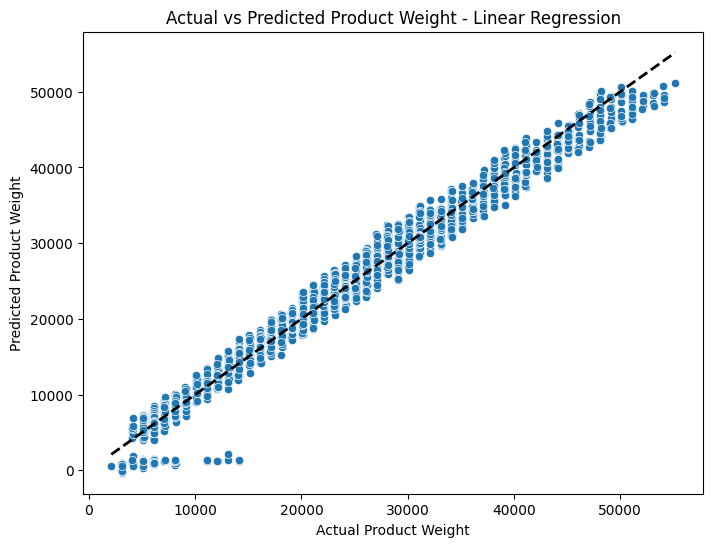

In [41]:
# creating the model
# feeding the training data to the model
# predicting the test set results
# calculating the mean squared error
# Calculating the r2 score

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split,cross_val_score
model=LinearRegression()
model.fit(X_train,y_train)
y_pred1=model.predict(X_test)
MSE1= mean_squared_error(y_test,y_pred1)
r21=r2_score(y_test,y_pred1)
mae1 = mean_absolute_error(y_test,y_pred1)
print('MAE:',mae1)
print('MSE:',MSE1)
print('r2_score:',r21)
# Scatter plot for Linear Regression model
scatter_plot('Linear Regression',y_test,y_pred1)

SUPPORT VECTOR MECHINE

Support vector machine is a supervised learning algorithm that can be used for both classification and regression challenges.It can easly handle multiple continous and categorical variables

MAE: 2576.910796470337
MSE: 11094501.357563308
r2_score: 0.91829930039989


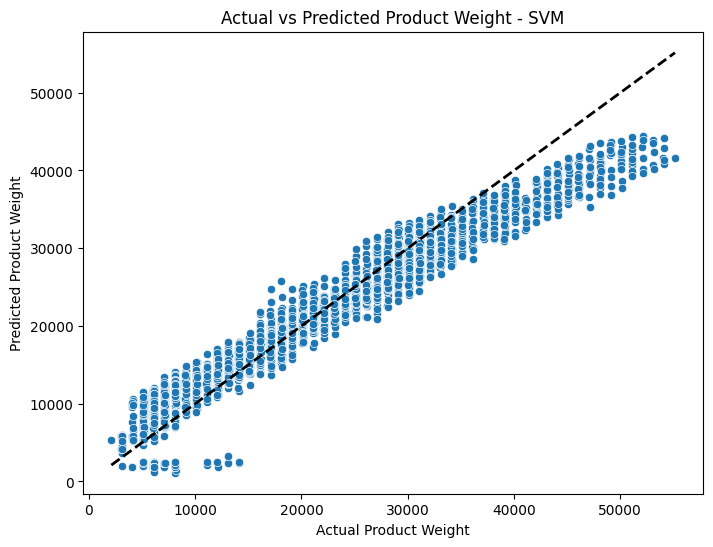

In [42]:
# creating the model
# feeding the training data to the model
# predicting the test set results
# calculating the mean squared error
# Calculating the r2 score
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
scalar=StandardScaler()
x_train_scaled=scalar.fit_transform(X_train)
X_test_scaled=scalar.transform(X_test)
model=SVR(kernel='linear')
model.fit(X_train_scaled,y_train)
y_pred2=model.predict(X_test_scaled)
MSE2= mean_squared_error(y_test,y_pred2)
r22=r2_score(y_test,y_pred2)
mae2 = mean_absolute_error(y_test,y_pred2)
print('MAE:',mae2)
print('MSE:',MSE2)
print('r2_score:',r22)
# Scatter plot for  model
scatter_plot('SVM', y_test,y_pred2)

XGBREGRESSOR

XGBREGRESSOR  is a supervised learning algorithm that can be used for both classification or regression challenges

MAE: 662.4411473463589
MSE: 810887.2177828336
r2_score: 0.9940285686706883


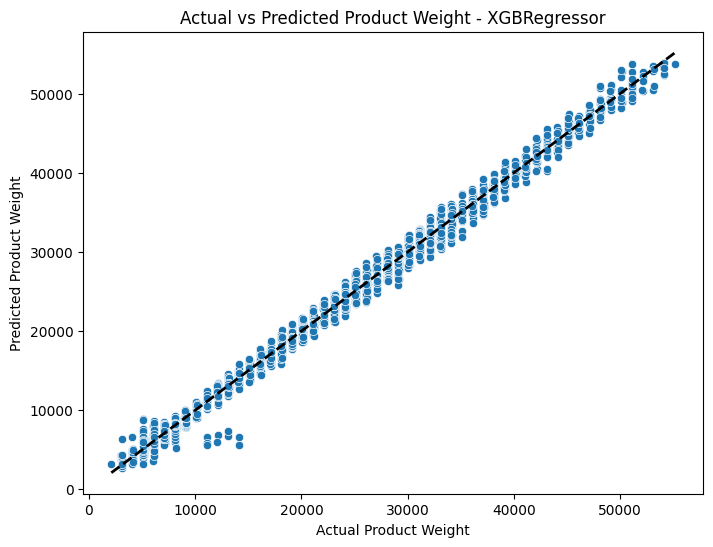

In [43]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X_train, y_train)

# Evaluate XGBoost model
y_pred3 = model.predict(X_test)
MSE3 = mean_squared_error(y_test, y_pred3)
r23 = r2_score(y_test, y_pred3)
mae3 = mean_absolute_error(y_test,y_pred3)
print('MAE:',mae3)
print('MSE:',MSE3)
print('r2_score:',r23)
# Scatter plot for  model
scatter_plot('XGBRegressor', y_test,y_pred3)

DECISION TREE

DECISION TREE is a simple representation for classifying examples.It is a supervised machine learning algorithm where the data is countinously split according to a certain parameter

MAE: 842.1946450060168
MSE: 1634781.075511432
r2_score: 0.9879613555167802


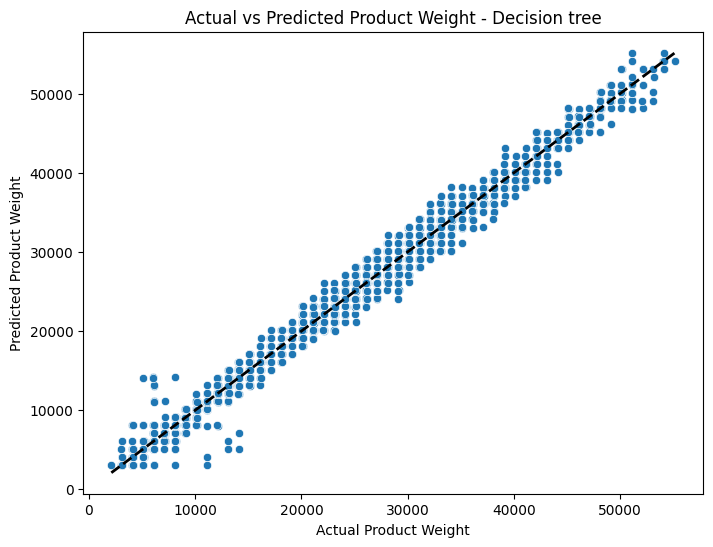

In [44]:
# creating the model
# feeding the training data to the model
# predicting the test set results
# calculating the mean squared error
# Calculating the r2 score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score
model=DecisionTreeRegressor(random_state=42)
model.fit(X_train,y_train)
y_pred4=model.predict(X_test)
MSE4= mean_squared_error(y_test,y_pred4)
r24=r2_score(y_test,y_pred4)
mae4 = mean_absolute_error(y_test,y_pred4)
print('MAE:',mae4)
print('MSE:',MSE4)
print('r2_score:',r24)
# Scatter plot for  model
scatter_plot('Decision tree', y_test,y_pred4)

RANDOM FOREST

RANDOM FOREST classifier is a set of decision trees from randomly selected subset of training set.It aggregates the votes from diffrent decision trees to decide the final class of the test object.It is an ensemble tree-based learning algorithm

MAE: 678.8451474127559
r2_score: 0.9937863432956946
MSE: 843780.0787357702


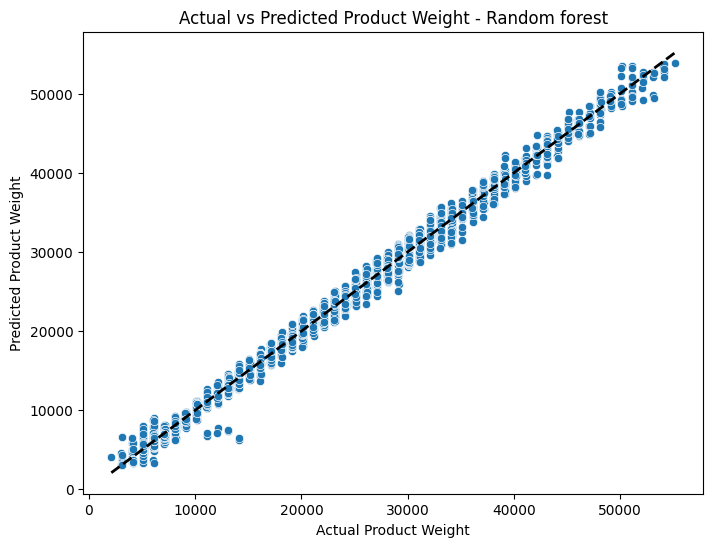

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score
model=RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(X_train,y_train)
y_pred5=model.predict(X_test)
MSE5= mean_squared_error(y_test,y_pred5)
r25=r2_score(y_test,y_pred5)
mae5 = mean_absolute_error(y_test,y_pred5)
print('MAE:',mae5)
print('r2_score:',r25)
print('MSE:',MSE5)
# Scatter plot for model
scatter_plot('Random forest', y_test,y_pred5)

 **NEURAL** **NETWORK**

NEURAL NETWORK is a machine learning model designed to mimic the function and structure of the human brain.Neural networks are intricate networks of interconnected nodes or neurons,that collaborate to tackle complicated problems

MAE: 1130.7168875419786
r2_score: 0.9833311864055014
MSE: 2263532.3315258967


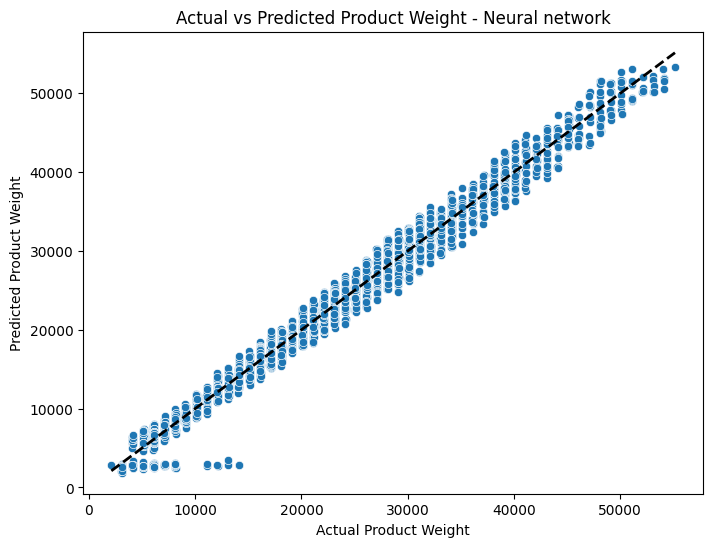

In [47]:
from sklearn.neural_network import MLPRegressor
neural_network_model = MLPRegressor(max_iter=1000)
model=neural_network_model.fit(X_train, y_train)

# Evaluate Neural Network model
y_pred6 = model.predict(X_test)
MSE6 = mean_squared_error(y_test,y_pred6)
r26 = r2_score(y_test,y_pred6)
mae6= mean_absolute_error(y_test,y_pred6)
print('MAE:',mae6)
print('r2_score:',r26)
print('MSE:',MSE6)
# Scatter plot for the model
scatter_plot('Neural network', y_test,y_pred6)

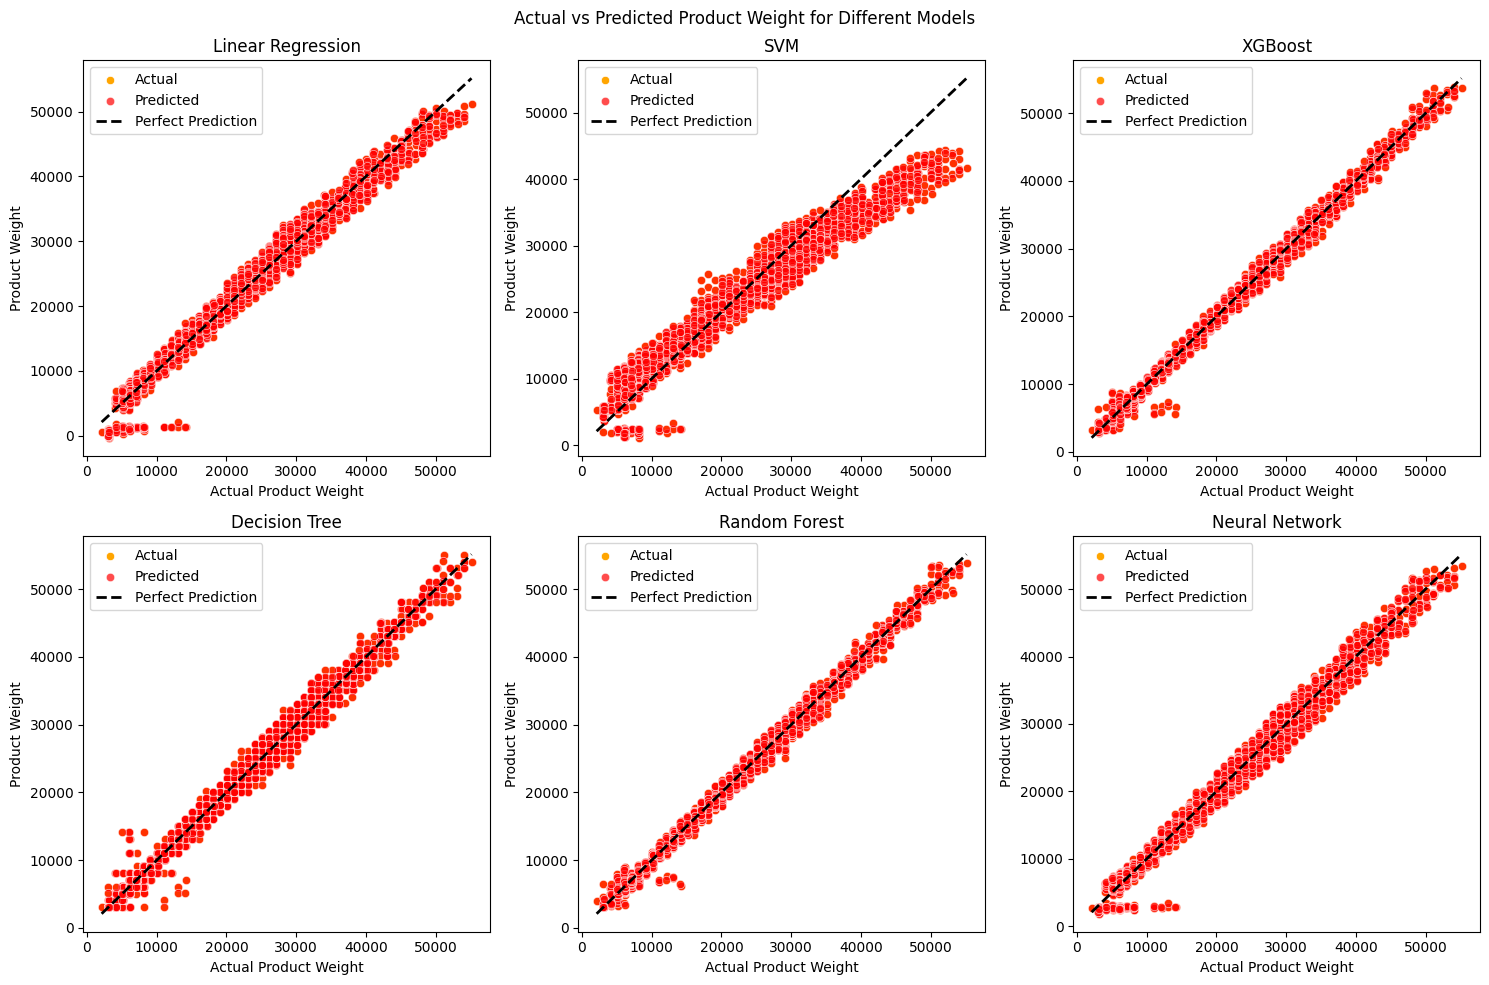

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame to store actual vs predicted values for each model
results_df = pd.DataFrame({
    'Actual': y_test,
    'Linear Regression':y_pred1 ,
    'SVM':y_pred2 ,
    'XGBoost':y_pred3 ,
    'Decision Tree':y_pred4 ,
    'Random Forest':y_pred5 ,
    'Neural Network': y_pred6})

# Create subplots for each model
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('Actual vs Predicted Product Weight for Different Models',)

# Flatten the 2D array of subplots for easy iteration
axes = axes.flatten()

# Loop through each model and plot its scatter plot with different colors
for i, model_name in enumerate(results_df.columns[1:]):
    sns.scatterplot(x='Actual', y=model_name, data=results_df, ax=axes[i], color='orange', label='Actual')
    sns.scatterplot(x='Actual', y=model_name, data=results_df, ax=axes[i], color='red', label='Predicted', alpha=0.7)
    axes[i].plot([results_df['Actual'].min(), results_df['Actual'].max()],
                 [results_df['Actual'].min(), results_df['Actual'].max()], 'k--', lw=2, label='Perfect Prediction')
    axes[i].set_xlabel('Actual Product Weight')
    axes[i].set_ylabel('Product Weight')
    axes[i].set_title(model_name)
    axes[i].legend()

# Adjust layout
plt.tight_layout()
plt.show()



In [49]:
compare = pd.DataFrame({'Model': ['Linear Regression', 'SVM','XGBregressor',
                                   'Decision Tree', 'Random Forest','NN'],
                        'MSE': [MSE1,MSE2,MSE3,MSE4,MSE5,MSE6],
                        'MAS':[mae1,mae2,mae3,mae4,mae5,mae6],
                        'R2_SCORE':[r21,r22,r23,r24,r25,r26]})
compare

,Model,MSE,MAS,R2_SCORE
0,Linear Regression,3.052417e+06,1270.053430,0.977522
1,SVM,1.109450e+07,2576.910796,0.918299
2,XGBregressor,8.108872e+05,662.441147,0.994029
3,Decision Tree,1.634781e+06,842.194645,0.987961
4,Random Forest,8.437801e+05,678.845147,0.993786
5,NN,2.263532e+06,1130.716888,0.983331


Model choice:
The best model is the Gradiant Boosting Regressor because it has the highest R2_score and the lowest mean_absolute_error, mean_squared_error without overfitting